<a href="https://colab.research.google.com/github/Aminm98/Deep-Learning-Final-project/blob/main/NN1_tensorflow_red_single_small_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.callbacks import ModelCheckpoint

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import datetime
import time
import copy

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
!ls drive/'My Drive/Colab Notebooks/Deep Learning/Final Project/NN1 Tensorflow'

class SimpleNeuralNetwork:

    def __init__(self):
        self.model = Sequential()

    def create_model(self, input_shape, num_outputs):
        self.model.add(Dense(512, activation='relu', input_shape=(input_shape,)))
        # self.model.add(Dense(512, activation='relu',kernel_regularizer = regularizers.l2(0.01)))
        self.model.add(Dense(256, activation='relu'))
        self.model.add(Dense(num_outputs))
        self.opt = Adam(learning_rate=0.0001)
        self.model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    def evaluate_model(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def predict(self, X_test):
        return self.model.predict(X_test)

nn = SimpleNeuralNetwork()

Num GPUs Available:  1
Mounted at /content/drive
input_faulty_data.csv	     NN1_tensorflow_red_single_small_predict.ipynb  Results
NN1_simple_tensorflow.ipynb  NN1_tensorflow_single_predict.ipynb	    selected_data_test.csv
NN1_tensorflow.ipynb	     NN1_tensorflow_single_small_predict.ipynb	    selected_data_train.csv


In [ ]:
# Data process

target_columns = ['Fext1', 'MextMeas1']
extra_input_columns = ['Fext1', 'MextMeas1','CylPosMeas1','vcdif1','dBetadif1']
fault_columns = ['CylPosMeas1','vcdif1','dBetadif1']

data_train = pd.read_csv('drive/My Drive/Colab Notebooks/Deep Learning/Final Project/NN1 Tensorflow/selected_data_train.csv')
data_test = pd.read_csv('drive/My Drive/Colab Notebooks/Deep Learning/Final Project/NN1 Tensorflow/selected_data_test.csv')
data_fault = pd.read_csv('drive/My Drive/Colab Notebooks/Deep Learning/Final Project/NN1 Tensorflow/input_faulty_data.csv')

X_train_val = data_train.drop(extra_input_columns, axis=1)
y_train_val = data_train[target_columns]
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
X_test = data_test.drop(extra_input_columns, axis=1)
y_test = data_test[target_columns]
X_fault = data_fault.drop(fault_columns, axis=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_fault = scaler.transform(X_fault)
y_train = scaler.fit_transform(y_train)
y_val = scaler.transform(y_val)
y_test = scaler.transform(y_test)

In [ ]:
# Model Setup

batch_size = 50

nn.create_model(input_shape=X_train.shape[1], num_outputs=len(target_columns))

In [ ]:
# Training

history = nn.model.fit(X_train, y_train, epochs=300, batch_size=batch_size, validation_data=(X_val, y_val))
# evaluation = nn.evaluate_model(X_val, y_val)
# print("Evaluation Loss and Metrics:", evaluation)

Epoch 1/300
7360/7360 [==============================] - 31s 4ms/step - loss: 0.1523 - mae: 0.3022 - val_loss: 0.1382 - val_mae: 0.2873
Epoch 2/300
7360/7360 [==============================] - 26s 4ms/step - loss: 0.1366 - mae: 0.2864 - val_loss: 0.1284 - val_mae: 0.2776
Epoch 3/300
7360/7360 [==============================] - 29s 4ms/step - loss: 0.1299 - mae: 0.2796 - val_loss: 0.1250 - val_mae: 0.2749
Epoch 4/300
7360/7360 [==============================] - 27s 4ms/step - loss: 0.1242 - mae: 0.2732 - val_loss: 0.1209 - val_mae: 0.2693
Epoch 5/300
7360/7360 [==============================] - 28s 4ms/step - loss: 0.1195 - mae: 0.2677 - val_loss: 0.1177 - val_mae: 0.2678
Epoch 6/300
7360/7360 [==============================] - 28s 4ms/step - loss: 0.1152 - mae: 0.2628 - val_loss: 0.1120 - val_mae: 0.2579
Epoch 7/300
7360/7360 [==============================] - 26s 4ms/step - loss: 0.1114 - mae: 0.2581 - val_loss: 0.1082 - val_mae: 0.2549
Epoch 8/300
7360/7360 [=========================

Text(0.5, 1.0, 'Validation Loss')

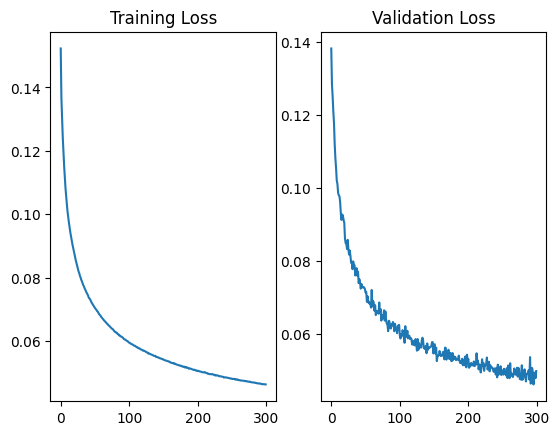

In [ ]:
# Checking prediction and validation losses

filename_date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
filename = 'NN1_tf_weights_'+filename_date
weightspath = 'drive/My Drive/Colab Notebooks/Deep Learning/Final Project/NN1 Tensorflow/Results/Weights/'+filename
nn.model.save_weights(weightspath)

history.history

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

train_loss = np.array(training_loss).reshape(len(training_loss),1)
validation_loss = np.array(validation_loss).reshape(len(validation_loss),1)
loss_vec = np.concatenate((train_loss, validation_loss), axis=1)

filename = 'NN1_tf_losses_'+filename_date
np.savetxt('drive/My Drive/Colab Notebooks/Deep Learning/Final Project/NN1 Tensorflow/Results/Predictions/'+filename+'.csv', loss_vec, delimiter=",")

plt.figure()
plt.subplot(1,2,1)
plt.plot(training_loss)
plt.title('Training Loss')
plt.subplot(1,2,2)
plt.plot(validation_loss)
plt.title('Validation Loss')

In [ ]:
# Testing

y_pred = nn.predict(X_test)

626/626 [==============================] - 1s 2ms/step


Text(0.5, 1.0, 'r Mext')

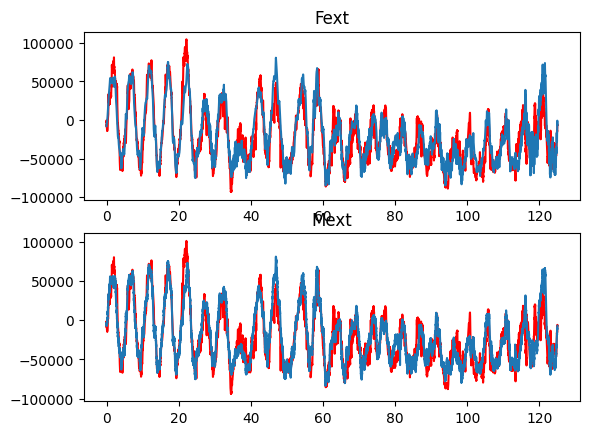

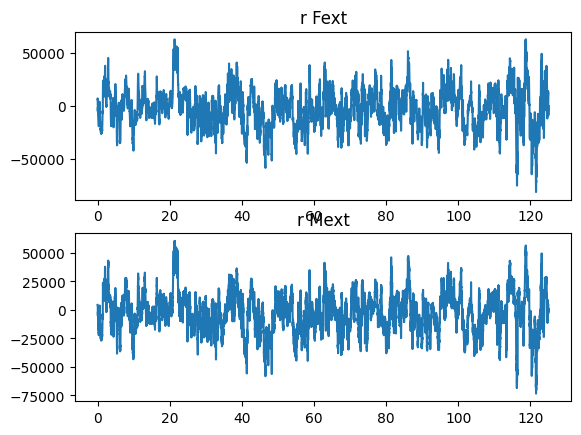

In [ ]:
# Saving and Plotting

y_plot = scaler.inverse_transform(y_pred)
y_test_plot = scaler.inverse_transform(y_test)
len_t = y_test.shape[0]
t = np.arange(0, len_t * 0.00625, 0.00625).reshape((len_t, 1))

filename_date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
filename = 'NN1_tf_'+filename_date
np.savetxt('drive/My Drive/Colab Notebooks/Deep Learning/Final Project/NN1 Tensorflow/Results/Predictions/'+filename+'.csv', y_plot.reshape((len_t, 2)), delimiter=",")

plt.figure()
plt.subplot(2,1,1)
plt.plot(t,y_plot[:,0],'r',t,y_test_plot[:,0])
plt.title('Fext')
plt.subplot(2,1,2)
plt.plot(t,y_plot[:,1],'r',t,y_test_plot[:,1])
plt.title('Mext')

plt.figure()
plt.subplot(2,1,1)
plt.plot(t,y_plot[:,0]-y_test_plot[:,0])
plt.title('r Fext')
plt.subplot(2,1,2)
plt.plot(t,y_plot[:,1]-y_test_plot[:,1])
plt.title('r Mext')

In [ ]:
y_fault = nn.predict(X_fault)

len_t2 = y_fault.shape[0]
y_fault_plot = scaler.inverse_transform(y_fault)
filename = 'NN1_tf_fault_'+filename_date
np.savetxt('drive/My Drive/Colab Notebooks/Deep Learning/Final Project/NN1 Tensorflow/Results/Predictions/'+filename+'.csv', y_fault_plot.reshape((len_t2, 2)), delimiter=",")

3001/3001 [==============================] - 5s 2ms/step
